# 逻辑回归

## 案例1：银行贷款违约分析

### 参数初始化

In [1]:
import pandas as pd

# 参数初始化
filename = 'data/bankloan.xls'
data = pd.read_excel(filename)
print(data.head())

   年龄  教育  工龄  地址   收入   负债率      信用卡负债      其他负债  违约
0  41   3  17  12  176   9.3  11.359392  5.008608   1
1  27   1  10   6   31  17.3   1.362202  4.000798   0
2  40   1  15  14   55   5.5   0.856075  2.168925   0
3  41   1  15  14  120   2.9   2.658720  0.821280   0
4  24   2   2   0   28  17.3   1.787436  3.056564   1


In [2]:
x = data.iloc[:, :8].as_matrix()
print(x)

[[ 41.         3.        17.       ...,   9.3       11.359392   5.008608]
 [ 27.         1.        10.       ...,  17.3        1.362202   4.000798]
 [ 40.         1.        15.       ...,   5.5        0.856075   2.168925]
 ..., 
 [ 33.         1.        15.       ...,   7.6        0.491264   1.940736]
 [ 45.         1.        19.       ...,   8.4        2.302608   4.165392]
 [ 37.         1.        12.       ...,  14.7        2.994684   3.473316]]


In [3]:
y = data.iloc[:, 8].as_matrix()
print(y)

[1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1
 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 1 1 1 0 0 1 1 

### 建立随机逻辑回归模型，筛选变量

In [4]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import RandomizedLogisticRegression as RLR

rlr = RLR()  # 建立随机逻辑回归模型，筛选变量
rlr.fit(x, y)  # 训练模型
rlr.get_support()  # 获取特征筛选结果，也可以通过.scores_方法获取各个特征的分数
print('通过随机逻辑回归模型筛选特征结束。')
print('有效特征为：%s' % ','.join(data.columns[rlr.get_support()]))
x = data[data.columns[rlr.get_support()]].as_matrix()  # 筛选好特征
print(x)

通过随机逻辑回归模型筛选特征结束。
有效特征为：工龄,地址,负债率,信用卡负债
[[ 17.        12.         9.3       11.359392]
 [ 10.         6.        17.3        1.362202]
 [ 15.        14.         5.5        0.856075]
 ..., 
 [ 15.         3.         7.6        0.491264]
 [ 19.        22.         8.4        2.302608]
 [ 12.        14.        14.7        2.994684]]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:1650: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 9 but corresponding boolean dimension is 8
  result = getitem(key)


### 建立逻辑回归模型

In [5]:
lr = LR()  # 建立逻辑回归模型
lr.fit(x, y)  # 用筛选后的特征数据来训练模型
print('逻辑回归模型训练结束。')
print(('模型的平均正确率为：%s' % lr.score(x, y)))  # 给出模型的平均正确率，本例为81.4%

逻辑回归模型训练结束。
模型的平均正确率为：0.814285714286


# 非线性回归

## 案例2

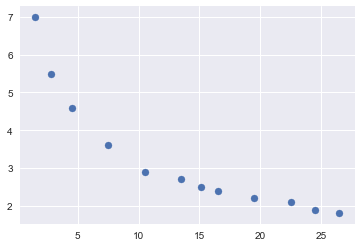

In [6]:
# 非线性回归
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics

%matplotlib inline

x = pd.DataFrame([1.5, 2.8, 4.5, 7.5, 10.5, 13.5, 15.1, 16.5, 19.5, 22.5, 24.5, 26.5])
y = pd.DataFrame([7.0, 5.5, 4.6, 3.6, 2.9, 2.7, 2.5, 2.4, 2.2, 2.1, 1.9, 1.8])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)

In [14]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x, y)

# The coefficients
print('Coefficients: \n', linreg.coef_)

y_pred = linreg.predict(x)
# The mean square error
print("MSE:", metrics.mean_squared_error(y, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % linreg.score(x, y))

Coefficients: 
 [[-0.4656313   0.01075704]]
MSE: 0.118119570951
Variance score: 0.95


### 多项式模型

In [16]:
# 多项式模型
x1 = x
x2 = x ** 2
x1['x2'] = x2

linreg = LinearRegression()
linreg.fit(x1, y)

# The coefficients
print('Coefficients: \n', linreg.coef_)

y_pred = linreg.predict(x)
# The mean square error
print("MSE:", metrics.mean_squared_error(y, y_pred))

Coefficients: 
 [[-0.4656313   0.01075704]]
MSE: 0.118119570951


### 对数模型

In [17]:
# 对数模型
x2 = pd.DataFrame(np.log(x[0]))

linreg = LinearRegression()
linreg.fit(x2, y)

# The coefficients
print('Coefficients: \n', linreg.coef_)

y_pred = linreg.predict(x2)
# The mean square error
print("MSE:", metrics.mean_squared_error(y, y_pred))

Coefficients: 
 [[-1.75683848]]
MSE: 0.0355123571858


### 指数模型

In [18]:
# 指数
y2 = pd.DataFrame(np.log(y))

linreg = LinearRegression()
linreg.fit(pd.DataFrame(x[0]), y2)

# The coefficients
print('Coefficients: \n', linreg.coef_)

y_pred = linreg.predict(pd.DataFrame(x[0]))
# The mean square error
print("MSE:", metrics.mean_squared_error(y2, y_pred))

Coefficients: 
 [[-0.04880874]]
MSE: 0.0147484198861


### 幂函数模型

In [11]:
# 幂函数
linreg = LinearRegression()
x2 = pd.DataFrame(np.log(x[0]))
y2 = pd.DataFrame(np.log(y))
linreg.fit(x2, y2)

# The coefficients
print('Coefficients: \n', linreg.coef_)

y_pred = linreg.predict(x2)
# The mean square error
print("MSE:", metrics.mean_squared_error(y2, y_pred))

Coefficients: 
 [[-0.47242789]]
MSE: 0.00108621015916


### 画图

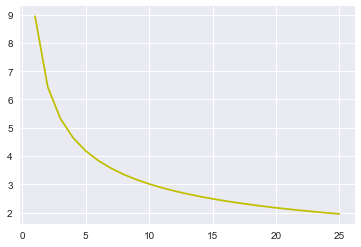

In [13]:
# 画图
xr = np.arange(int(x[0].min()), int(x[0].max()), 1)
yr = np.exp(linreg.coef_[0, 0] * np.log(xr) + linreg.intercept_[0])
plt.plot(xr, yr, color='y')

参考资料：炼数成金Python数据分析课程